In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing the dataset
df = pd.read_csv('krdop.csv', sep=';')
df.head(20)

,HumanFlow,NumberOfChecksPerMonth,The_total_area_is_sq.m.,Specialized_bread
0,7.793174,7.906547,0,0
1,7.847763,8.608495,1,1
2,5.451038,7.913521,2,0
3,6.885510,8.751791,3,0
4,6.566672,9.486608,4,0
5,6.040255,8.785540,5,0
6,7.586296,8.753371,6,1
7,7.167038,8.465900,7,1
8,7.372829,8.821437,8,0
9,7.013915,8.110427,9,0


In [3]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:]
y = df['HumanFlow']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [4]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg_1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [5]:
import pickle
input = open('data_reg_1.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

In [6]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(y_train)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

In [7]:
#!pip install tensorflow
#!pip install keras

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:

# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(5, activation = 'tanh', input_dim = 3))

# Adding the second hidden layer
rnn.add(Dense(2, activation = 'tanh'))


# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [10]:
# Fitting the ANN to the Training set
k = rnn.fit(X_train, y_train, batch_size = 8, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 103ms/step - loss: 1.9396 - accuracy: 0.0000e+00 - val_loss: 5.5123 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 1.9044 - accuracy: 0.0000e+00 - val_loss: 5.4398 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 1.8774 - accuracy: 0.0000e+00 - val_loss: 5.3632 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 1.8435 - accuracy: 0.0000e+00 - val_loss: 5.2947 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 1.8159 - accuracy: 0.0000e+00 - val_loss: 5.2248 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 1.7828 - accuracy: 0.0000e+00 - val_loss: 5.1552 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 18ms/step - loss: 1.7576 - accuracy: 0.0000e+00 - val_los

5/5 [==============================] - 0s 13ms/step - loss: 1.0785 - accuracy: 0.0000e+00 - val_loss: 3.1354 - val_accuracy: 0.0000e+00
Epoch 57/100
5/5 [==============================] - 0s 13ms/step - loss: 1.0697 - accuracy: 0.0000e+00 - val_loss: 3.1251 - val_accuracy: 0.0000e+00
Epoch 58/100
5/5 [==============================] - 0s 13ms/step - loss: 1.0645 - accuracy: 0.0000e+00 - val_loss: 3.1089 - val_accuracy: 0.0000e+00
Epoch 59/100
5/5 [==============================] - 0s 13ms/step - loss: 1.0590 - accuracy: 0.0000e+00 - val_loss: 3.0965 - val_accuracy: 0.0000e+00
Epoch 60/100
5/5 [==============================] - 0s 13ms/step - loss: 1.0515 - accuracy: 0.0000e+00 - val_loss: 3.0810 - val_accuracy: 0.0000e+00
Epoch 61/100
5/5 [==============================] - 0s 10ms/step - loss: 1.0447 - accuracy: 0.0000e+00 - val_loss: 3.0685 - val_accuracy: 0.0000e+00
Epoch 62/100
5/5 [==============================] - 0s 10ms/step - loss: 1.0387 - accuracy: 0.0000e+00 - val_loss: 3.05

In [11]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

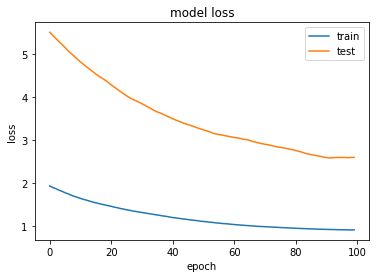

In [12]:

# Plotting loss & accuracy
plt.figure()
plt.plot(k.history['loss'])
plt.plot(k.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [13]:
# Initialising the ANN
rnn1 = Sequential()

# Adding the input layer and the first hidden layer
rnn1.add(Dense(5, activation = 'tanh', input_dim = 3))


# Adding the third hidden layer
rnn1.add(Dense(2, activation = 'tanh'))

# Adding the output layer
rnn1.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [14]:
# Fitting the ANN to the Training set
k1 = rnn1.fit(X_train, y_train, batch_size = 8, validation_data=(X_test, y_test), epochs = 10)

Epoch 1/10
5/5 [==============================] - 1s 71ms/step - loss: 1.1800 - accuracy: 0.0000e+00 - val_loss: 1.4090 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 1.1631 - accuracy: 0.0000e+00 - val_loss: 1.4203 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 11ms/step - loss: 1.1526 - accuracy: 0.0000e+00 - val_loss: 1.4359 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 1.1376 - accuracy: 0.0000e+00 - val_loss: 1.4432 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 1.1276 - accuracy: 0.0000e+00 - val_loss: 1.4543 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 8ms/step - loss: 1.1164 - accuracy: 0.0000e+00 - val_loss: 1.4689 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 1.1062 - accuracy: 0.0000e+00 - val_loss: 1.4849 

In [15]:

# Predicting the Test set results
y_pred1 = rnn1.predict(X_test)

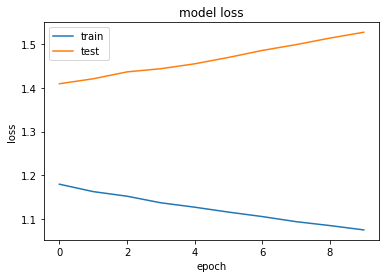

In [16]:

# Plotting loss & accuracy
plt.figure()
plt.plot(k1.history['loss'])
plt.plot(k1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [17]:

# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [18]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat, squared=False).round(3)

(0.456, 0.768)

In [19]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(sc_y.inverse_transform(y_train), sc_y.inverse_transform(rnn1.predict(X_train)), squared=False).round(3), mean_squared_error(y_test, y_hat1, squared=False).round(3)

(0.492, 0.588)

In [20]:
# Inversing scaling
from sklearn.preprocessing import StandardScaler
y_hat1 = sc_y.inverse_transform(y_pred1)
y_test1 = sc_y.inverse_transform(y_test)
X_test1 = sc_X.inverse_transform(X_test)

# ВЫВОДЫ

Итак, в качестве экссперимента была построена НС на наиболее значимых переменных. Их в модели 3. С самой НС были проведены эксперименты и выбраны самые оптимальные значения. Таким образом, данная НС работает лучше, чем на всех параметрах. А разрыв на тестовой и обучающей минимален (даже меньше, чем у множественной регресси) А значит делаем вывод, что данный метод имеет лучший показатель  для качества модели и может быть использован для работы.